# Factors affecting Economic Growth in Developing Countries

Group members:  
\- Aaryan Mehar(190012)  
\- Namgyal Lhamo Dolma (190528)  
\- Pranjal Sharma (190627)  
\- Tanisha Agarwal (190892)  
\- Yash Gupta (190997)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Data preprocessing

### Reading the World Bank data

In [2]:
cols = ['year', 'country', 'growth', 'gdp', 'export', 'debt', 'resource', 'aid', 'life', 'invest', 'fdi', 'deflator']
data = pd.read_csv('data/data_world_bank.csv')
data.columns = cols
data

,year,country,growth,gdp,export,debt,resource,aid,life,invest,fdi,deflator
0,1990,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,50.331,NaN,NaN,NaN
1,1990,Algeria,-1.754076,3123.995683,3.189756e+10,NaN,17.705187,NaN,66.938,NaN,0.000540,30.259599
2,1990,Angola,-6.657467,2998.780751,NaN,NaN,28.958619,NaN,45.306,NaN,-2.979635,14.007440
3,1990,Bangladesh,3.086982,512.096589,1.631244e+09,NaN,0.537215,NaN,58.210,NaN,0.010250,6.532735
4,1990,Belize,9.017296,3147.267760,2.596129e+08,28.129049,0.763750,NaN,71.242,10.979978,4.173882,0.172866
...,...,...,...,...,...,...,...,...,...,...,...,...
487,2015,Vietnam,5.570526,2085.101349,1.734904e+11,NaN,4.206113,NaN,75.110,NaN,6.106361,-0.190788
488,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,NaN,0.000000,NaN,73.442,0.255305,0.751036,-3.707013
489,2015,"Yemen, Rep.",-29.827145,1601.830063,NaN,NaN,2.105149,NaN,66.085,NaN,-0.036388,46.476251
490,2015,Zambia,-0.187950,1338.290927,7.892389e+09,49.407327,11.163582,NaN,61.737,3.090412,7.447417,6.659292


In [3]:
# list of developing countries
countries = data.country.unique()
len(countries)

82

### Analysing missing values

In [4]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

aid         99.390244
debt        83.739837
invest      66.869919
export      30.691057
fdi          9.552846
gdp          8.943089
deflator     7.926829
growth       7.723577
resource     7.317073
life         0.000000
country      0.000000
year         0.000000
dtype: float64

As there is a lot of missing data for `aid`, `debt` and `invest`, we will drop these columns

In [5]:
data.drop(['aid', 'debt', 'invest'], axis=1, inplace=True)

### Reading the IMF data

In [6]:
cols_imf = ['country', 'variable', 'unit', '1990', '1995', '2000', '2005', '2010', '2015']
data_imf = pd.read_csv('data/data_imf.csv')
data_imf.columns = cols_imf
data_imf

,country,variable,unit,1990,1995,2000,2005,2010,2015
0,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,554.91,899.956,"1,197.01"
1,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,11.83,8.438,0.988
2,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,304.926,711.759,"1,226.57"
3,Afghanistan,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,6.167,15.325,20.057
4,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,NaN,NaN,NaN,25.982,46.309,72.056
...,...,...,...,...,...,...,...,...,...
8815,Zimbabwe,General government gross debt,National currency,NaN,NaN,NaN,2.991,5.729,9.477
8816,Zimbabwe,General government gross debt,Percent of GDP,NaN,NaN,NaN,33.061,47.577,47.473
8817,Zimbabwe,Gross domestic product corresponding to fiscal...,National currency,10.144,8.263,11.34,9.046,12.042,19.963
8818,Zimbabwe,Current account balance,U.S. dollars,-0.257,-0.369,0.322,-0.087,-1.655,-1.597


We need the data for investment, exports, unemployment and debt of the developing countries only

In [7]:
data_imf_final = data_imf[(data_imf.country.isin(countries)) & ((data_imf.variable == 'Total investment') | (data_imf.variable == 'Volume of exports of goods and services') | (data_imf.variable == 'Unemployment rate') | ((data_imf.variable == 'General government gross debt') & (data_imf.unit == 'Percent of GDP')))].reset_index()
data_imf_final.drop('index', axis=1, inplace=True)
data_imf_final

,country,variable,unit,1990,1995,2000,2005,2010,2015
0,Afghanistan,Total investment,Percent of GDP,NaN,NaN,NaN,37.048,30.269,18.467
1,Afghanistan,Volume of exports of goods and services,Percent change,NaN,NaN,NaN,46.504,10.856,-11.653
2,Afghanistan,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,General government gross debt,Percent of GDP,NaN,NaN,NaN,206.356,7.697,9.154
4,Algeria,Total investment,Percent of GDP,28.896,31.571,23.563,31.656,41.43,50.781
...,...,...,...,...,...,...,...,...,...
275,Zambia,General government gross debt,Percent of GDP,NaN,NaN,260.964,75.748,18.898,65.777
276,Zimbabwe,Total investment,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN
277,Zimbabwe,Volume of exports of goods and services,Percent change,NaN,NaN,NaN,NaN,NaN,NaN
278,Zimbabwe,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN


### Analysing missing data

In [8]:
vars = ['Total investment', 'Volume of exports of goods and services', 'Unemployment rate', 'General government gross debt']
for var in vars:
    print(var)
    print(data_imf_final[data_imf_final.variable == var].isna().sum() / len(data_imf_final[data_imf_final.variable == var]) * 100)
    print()

Total investment
country      0.000000
variable     0.000000
unit         0.000000
1990        28.571429
1995        17.142857
2000        14.285714
2005        11.428571
2010        11.428571
2015        10.000000
dtype: float64

Volume of exports of goods and services
country      0.000000
variable     0.000000
unit         0.000000
1990        34.285714
1995        18.571429
2000        11.428571
2005        10.000000
2010        10.000000
2015        10.000000
dtype: float64

Unemployment rate
country      0.000000
variable     0.000000
unit         0.000000
1990        81.428571
1995        75.714286
2000        72.857143
2005        71.428571
2010        68.571429
2015        70.000000
dtype: float64

General government gross debt
country      0.000000
variable     0.000000
unit         0.000000
1990        85.714286
1995        65.714286
2000        21.428571
2005         5.714286
2010         2.857143
2015         1.428571
dtype: float64



As there is a lot of missing data in the IMF dataset also, we will not use this dataset

### Removing missing target variable

In [9]:
data.dropna(subset=['growth'], inplace=True)
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data

,year,country,growth,gdp,export,resource,life,fdi,deflator
0,1990,Algeria,-1.754076,3123.995683,3.189756e+10,17.705187,66.938,0.000540,30.259599
1,1990,Angola,-6.657467,2998.780751,NaN,28.958619,45.306,-2.979635,14.007440
2,1990,Bangladesh,3.086982,512.096589,1.631244e+09,0.537215,58.210,0.010250,6.532735
3,1990,Belize,9.017296,3147.267760,2.596129e+08,0.763750,71.242,4.173882,0.172866
4,1990,Benin,5.507343,795.071655,6.169462e+08,7.735960,53.812,-0.150760,2.176597
...,...,...,...,...,...,...,...,...,...
449,2015,Vietnam,5.570526,2085.101349,1.734904e+11,4.206113,75.110,6.106361,-0.190788
450,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,0.000000,73.442,0.751036,-3.707013
451,2015,"Yemen, Rep.",-29.827145,1601.830063,NaN,2.105149,66.085,-0.036388,46.476251
452,2015,Zambia,-0.187950,1338.290927,7.892389e+09,11.163582,61.737,7.447417,6.659292


Let's find the amount of missing data now

In [10]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

export      25.330396
fdi          3.524229
gdp          1.982379
resource     1.321586
deflator     0.220264
life         0.000000
growth       0.000000
country      0.000000
year         0.000000
dtype: float64

### Imputing missing values using k-NN

In [11]:
imp = KNNImputer(n_neighbors=5)
data.iloc[:, 3:] = imp.fit_transform(data.iloc[:, 3:])
data

,year,country,growth,gdp,export,resource,life,fdi,deflator
0,1990,Algeria,-1.754076,3123.995683,3.189756e+10,17.705187,66.938,0.000540,30.259599
1,1990,Angola,-6.657467,2998.780751,1.175058e+11,28.958619,45.306,-2.979635,14.007440
2,1990,Bangladesh,3.086982,512.096589,1.631244e+09,0.537215,58.210,0.010250,6.532735
3,1990,Belize,9.017296,3147.267760,2.596129e+08,0.763750,71.242,4.173882,0.172866
4,1990,Benin,5.507343,795.071655,6.169462e+08,7.735960,53.812,-0.150760,2.176597
...,...,...,...,...,...,...,...,...,...
449,2015,Vietnam,5.570526,2085.101349,1.734904e+11,4.206113,75.110,6.106361,-0.190788
450,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,0.000000,73.442,0.751036,-3.707013
451,2015,"Yemen, Rep.",-29.827145,1601.830063,4.191094e+10,2.105149,66.085,-0.036388,46.476251
452,2015,Zambia,-0.187950,1338.290927,7.892389e+09,11.163582,61.737,7.447417,6.659292


### Separating data of different years

In [12]:
df_dict = {}
for year in range(1990, 2016, 5):
    df_dict[year] = data[data.year == year]

In [13]:
# for year in range(1990, 2016, 5):
#     print(f'Year: {year}')
#     print(df_dict[year].isna().sum().sort_values(ascending=False))
#     print()

### Data Standardization

In [ ]:
for year in range(1990, 2016, 5):
    scaler = StandardScaler()
    df_dict[year].iloc[:, 2:] = scaler.fit_transform(df_dict[year].iloc[:, 2:])

## Linear Regression Model

### Fitting the model

Let's fit a linear regressor for the data of each year separately

In [15]:
lr_dict = {}
X_dict = {}
y_dict = {}
for year in range(1990, 2016, 5):
    X_dict[year] = df_dict[year].drop(['year', 'country', 'growth', 'deflator'], axis=1)
    y_dict[year] = df_dict[year].growth
    lr_dict[year] = LinearRegression().fit(X_dict[year], y_dict[year])
    print(f'Year {year}: R2 Score: {lr_dict[year].score(X_dict[year], y_dict[year])}')

Year 1990: R2 Score: 0.09222281341066108
Year 1995: R2 Score: 0.044699723800550095
Year 2000: R2 Score: 0.16576710085424884
Year 2005: R2 Score: 0.1386886506290319
Year 2010: R2 Score: 0.06917568476714364
Year 2015: R2 Score: 0.0494919517588952


We don't get very good R2 scores as the data is very varied

### Inferences

Let's find the coefficients of the model for each year

In [16]:
for year in range(1990, 2016, 5):
    print(f'Year {year}: coef: {lr_dict[year].coef_} intercept: {lr_dict[year].intercept_}')

Year 1990: coef: [-0.08370622 -0.08081019  0.06978284  0.30705136  0.09774508] intercept: -1.502253052031049e-16
Year 1995: coef: [ 0.12166271 -0.01983644 -0.07952231 -0.2923698   0.00775054] intercept: -8.439385445560911e-17
Year 2000: coef: [-0.03618852  0.24390176  0.03884082  0.34366529  0.11191125] intercept: -6.106567561566461e-17
Year 2005: coef: [-0.09381817  0.23865282  0.21001673  0.23517943  0.00124439] intercept: -5.297645537935546e-17
Year 2010: coef: [-0.15422639  0.1726359   0.14521424 -0.0146353  -0.04424017] intercept: -1.883487593622738e-17
Year 2015: coef: [-0.10670889  0.05246991 -0.06271737  0.2304539  -0.00328465] intercept: -3.134739147748706e-16


### Plotting the variables

We will now plot the target variable with respect to each independent variable and see the variations through the years

gdp


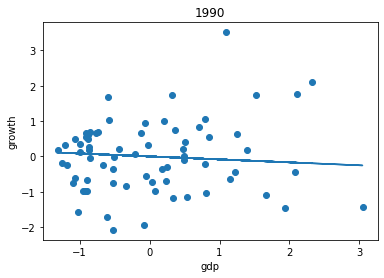

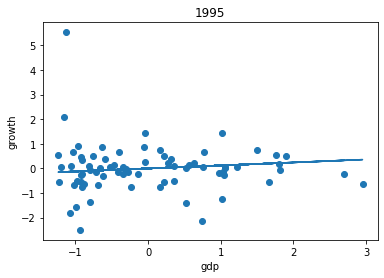

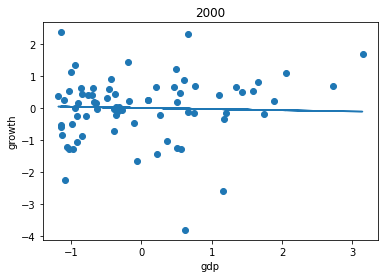

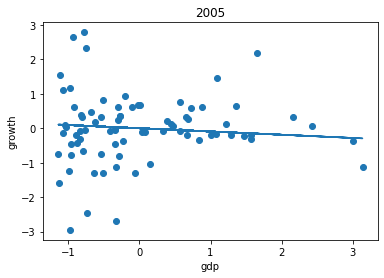

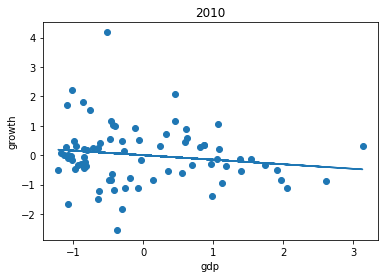

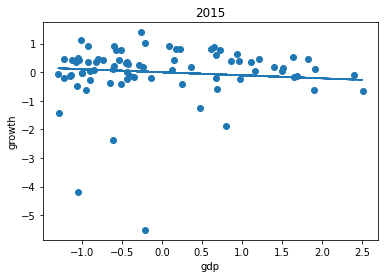

export


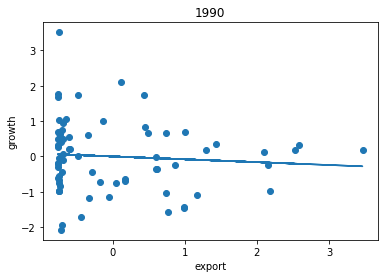

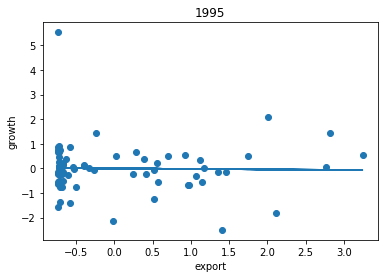

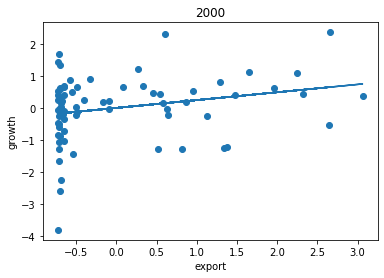

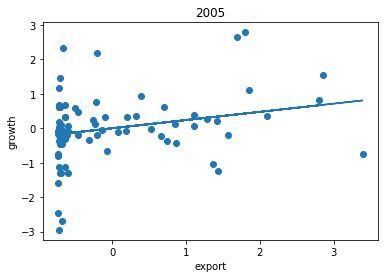

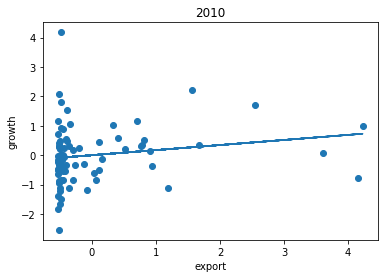

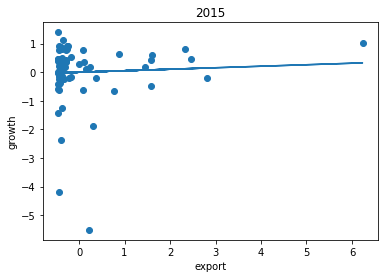

resource


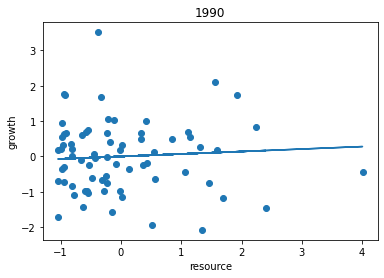

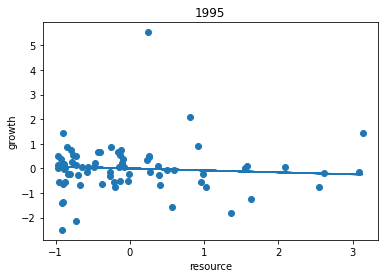

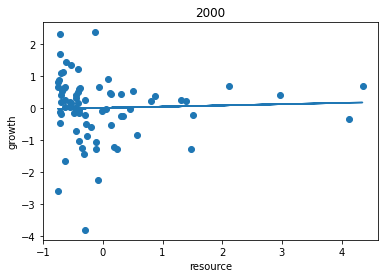

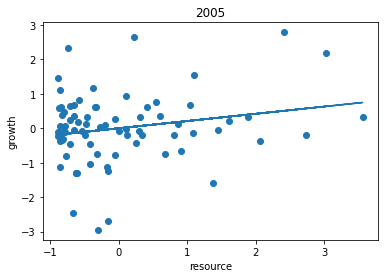

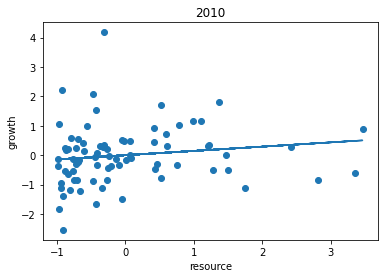

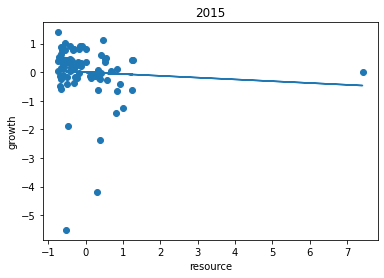

life


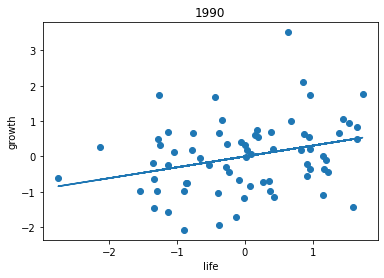

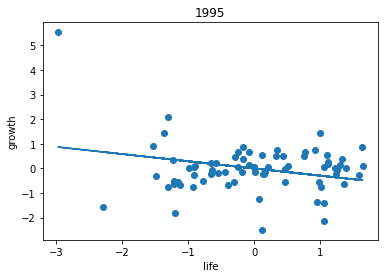

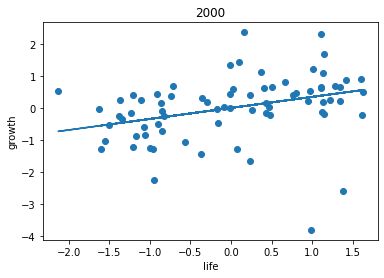

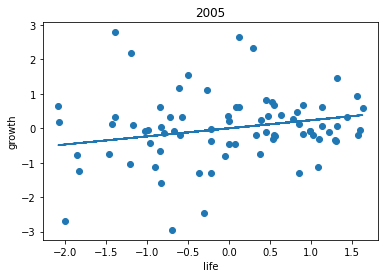

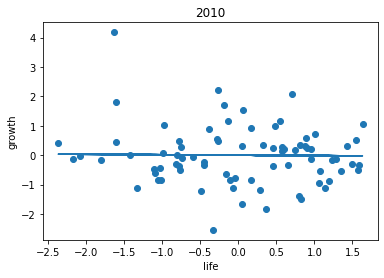

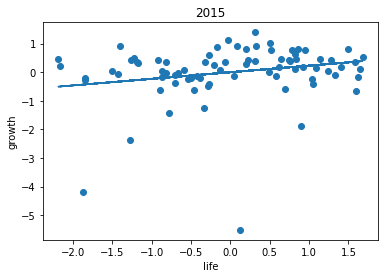

fdi


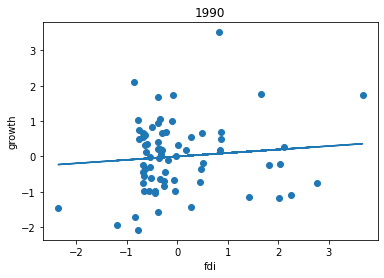

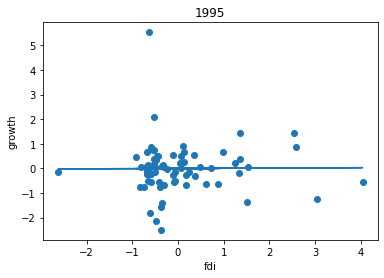

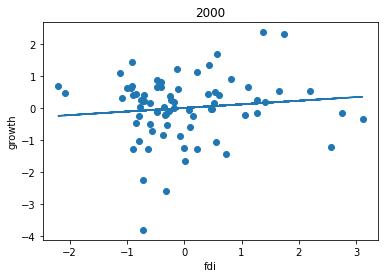

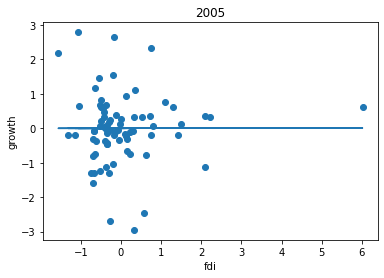

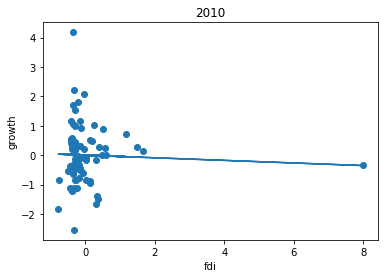

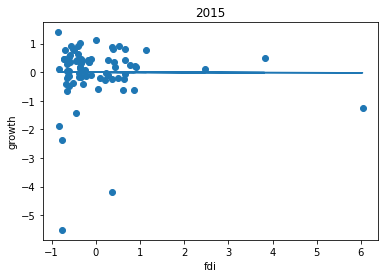

In [17]:
for i, col in enumerate(data.columns[3:-1]):
    print(col)
    for year in range(1990, 2016, 5):
        plt.scatter(X_dict[year][col], y_dict[year])
        y_pred = lr_dict[year].coef_[i] * X_dict[year][col] + lr_dict[year].intercept_
        plt.plot(X_dict[year][col], y_pred)
        plt.title(year)
        plt.ylabel('growth')
        plt.xlabel(col)
        plt.show()